In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf
import plotly.offline as py        
import plotly.graph_objs as go       
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pio.renderers.default = "browser"

In [81]:
df = pd.read_excel('Erdos project dataset 2017.xlsx')
df_obese = pd.read_excel('State_Obese.xlsx')
df.head()

,County,State,Population_Estimate_2017,StateFIPS,State.1,WIC_PART_2017,NSLP_PART_2017,SBP_PART_2017,CACFP_PART_2017,SFSP_PART_2017,...,REDEMP_SNAPS17,PCT_SNAP17,PC_SNAPBEN17,PCT_NSLP17,PCT_SBP17,PCT_SFSP17,PCT_WIC17,PCT_CACFP17,PCT_OBESE_ADULTS17,PCT_HSPA17
0,Autauga County,Alabama,55443,1.0,Alabama,1.239926e+05,5.116431e+05,2.713241e+05,61361.50,51622.0,...,223185.678358,16.500056,16.354677,63.12659,33.475354,6.369006,2.54357,1.258763,36.3,NaN
1,Baldwin County,Alabama,212619,2.0,Alaska,1.818817e+04,5.357797e+04,2.676915e+04,10082.50,4959.0,...,157623.133568,16.500056,11.479360,63.12659,33.475354,6.369006,2.54357,1.258763,36.3,NaN
2,Barbour County,Alabama,25158,4.0,Arizona,1.535101e+05,6.381362e+05,3.147256e+05,42284.75,12301.0,...,257032.078889,16.500056,29.122147,63.12659,33.475354,6.369006,2.54357,1.258763,36.3,NaN
3,Bibb County,Alabama,22555,5.0,Arkansas,7.651850e+04,3.142015e+05,1.848509e+05,63450.25,23544.0,...,227725.245138,16.500056,17.557791,63.12659,33.475354,6.369006,2.54357,1.258763,36.3,NaN
4,Blount County,Alabama,57827,6.0,California,1.080241e+06,3.215762e+06,1.727064e+06,617881.75,152251.0,...,142860.825560,16.500056,12.377973,63.12659,33.475354,6.369006,2.54357,1.258763,36.3,NaN


In [82]:
df_obese.head()

,State,PCT_OBESE_ADULTS17
0,Alabama,36.3
1,Alaska,34.2
2,Arizona,29.5
3,Arkansas,35.0
4,California,25.1


In [83]:
df.shape

(3142, 25)

In [84]:
df.dtypes

County                       object
State                        object
Population_Estimate_2017      int64
StateFIPS                   float64
State.1                      object
WIC_PART_2017               float64
NSLP_PART_2017              float64
SBP_PART_2017               float64
CACFP_PART_2017             float64
SFSP_PART_2017              float64
State_Population_2016       float64
State_Population_2017       float64
State_Population_2018       float64
SNAPS17                     float64
SNAPSPTH17                  float64
REDEMP_SNAPS17              float64
PCT_SNAP17                  float64
PC_SNAPBEN17                float64
PCT_NSLP17                  float64
PCT_SBP17                   float64
PCT_SFSP17                  float64
PCT_WIC17                   float64
PCT_CACFP17                 float64
PCT_OBESE_ADULTS17          float64
PCT_HSPA17                  float64
dtype: object

In [85]:
df.describe()

,Population_Estimate_2017,StateFIPS,WIC_PART_2017,NSLP_PART_2017,SBP_PART_2017,CACFP_PART_2017,SFSP_PART_2017,State_Population_2016,State_Population_2017,State_Population_2018,...,REDEMP_SNAPS17,PCT_SNAP17,PC_SNAPBEN17,PCT_NSLP17,PCT_SBP17,PCT_SFSP17,PCT_WIC17,PCT_CACFP17,PCT_OBESE_ADULTS17,PCT_HSPA17
count,3.142000e+03,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,...,2894.000000,3142.000000,3086.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,2383.000000
mean,1.034841e+05,28.960784,1.397460e+05,5.823767e+05,2.852300e+05,88364.632353,51396.490196,6.334732e+06,6.375434e+06,6.415048e+06,...,194898.500317,12.893772,16.169817,59.171247,28.208134,4.899214,2.142253,1.445701,31.863940,24.620520
std,3.320993e+05,15.832828,1.932998e+05,6.714610e+05,3.643768e+05,122836.351472,67208.947305,7.242171e+06,7.294685e+06,7.343308e+06,...,102798.594353,3.168204,9.111363,8.941445,8.042021,2.254968,0.407819,0.411917,3.329348,2.822971
min,8.800000e+01,1.000000,1.015858e+04,4.710056e+04,1.570670e+04,7069.000000,3579.000000,5.842900e+05,5.789340e+05,5.777370e+05,...,8375.216000,5.668505,0.436994,40.200015,10.545776,1.035726,0.972890,0.602667,22.600000,13.400000
25%,1.088900e+04,16.500000,3.698321e+04,1.733965e+05,7.794888e+04,23271.750000,12761.500000,1.756930e+06,1.767976e+06,1.780020e+06,...,120165.060906,10.400643,9.600722,51.237761,22.819343,3.349687,1.858326,1.198037,30.100000,22.400000
50%,2.578400e+04,29.000000,9.595817e+04,4.424775e+05,1.955470e+05,50680.250000,32655.000000,4.438229e+06,4.453874e+06,4.468402e+06,...,187407.742485,13.290553,14.884892,59.919623,25.093938,4.802215,2.126099,1.380629,32.400000,24.700000
75%,6.781575e+04,41.500000,1.459558e+05,6.751359e+05,3.207996e+05,93717.375000,66392.500000,7.120066e+06,7.237154e+06,7.353618e+06,...,253627.547602,14.702413,20.776201,65.763054,35.287909,5.715970,2.422094,1.664740,33.800000,26.500000
max,1.011876e+07,56.000000,1.080241e+06,3.348977e+06,1.909051e+06,617881.750000,416749.000000,3.920913e+07,3.939935e+07,3.955704e+07,...,858017.806533,22.055479,103.595009,77.526608,56.544594,20.811003,2.903674,4.410012,38.100000,30.800000


In [86]:
missing_value = df.isnull().sum()
missing_value

County                         0
State                          0
Population_Estimate_2017       0
StateFIPS                   3091
State.1                     3091
WIC_PART_2017               3091
NSLP_PART_2017              3091
SBP_PART_2017               3091
CACFP_PART_2017             3091
SFSP_PART_2017              3091
State_Population_2016       3091
State_Population_2017       3091
State_Population_2018       3091
SNAPS17                       26
SNAPSPTH17                    27
REDEMP_SNAPS17               248
PCT_SNAP17                     0
PC_SNAPBEN17                  56
PCT_NSLP17                     0
PCT_SBP17                      0
PCT_SFSP17                     0
PCT_WIC17                      0
PCT_CACFP17                    0
PCT_OBESE_ADULTS17             0
PCT_HSPA17                   759
dtype: int64

In [100]:
erdos_columns = [
    'State.1', 'WIC_PART_2017', 'NSLP_PART_2017', 'SBP_PART_2017',
    'CACFP_PART_2017', 'SFSP_PART_2017', 'State_Population_2017'
]
df_erdos_selected = df[erdos_columns]

# Merge the selected columns with the State_Obese dataset
df_combined = pd.merge(df_erdos_selected, df_obese, left_on='State.1', right_on='State')

# Drop the redundant 'State' column from the merged dataframe
df_combined.drop(columns=['State'], inplace=True)

df_combined['Number_Obese_Adults_2017'] = (df_combined['PCT_OBESE_ADULTS17'] * df_combined['State_Population_2017']) / 100
# Save the combined dataset to a file
output_combined_path = '/Users/sayantansarkar/Downloads/combined_state_dataset2.xlsx'
df_combined.to_excel(output_combined_path, index=False)

# Display the combined dataset
df_combined.head()

,State.1,WIC_PART_2017,NSLP_PART_2017,SBP_PART_2017,CACFP_PART_2017,SFSP_PART_2017,State_Population_2017,PCT_OBESE_ADULTS17,Number_Obese_Adults_2017
0,Alabama,1.239926e+05,5.116431e+05,2.713241e+05,61361.50,51622.0,4875120.0,36.3,1769668.560
1,Alaska,1.818817e+04,5.357797e+04,2.676915e+04,10082.50,4959.0,739786.0,34.2,253006.812
2,Arizona,1.535101e+05,6.381362e+05,3.147256e+05,42284.75,12301.0,7048876.0,29.5,2079418.420
3,Arkansas,7.651850e+04,3.142015e+05,1.848509e+05,63450.25,23544.0,3002997.0,35.0,1051048.950
4,California,1.080241e+06,3.215762e+06,1.727064e+06,617881.75,152251.0,39399349.0,25.1,9889236.599


In [88]:
# First lets analyse the state level data 

In [101]:
df_state =df_combined.iloc[:51]

In [133]:
df_state.head(10)

,State.1,WIC_PART_2017,NSLP_PART_2017,SBP_PART_2017,CACFP_PART_2017,SFSP_PART_2017,State_Population_2017,PCT_OBESE_ADULTS17,Number_Obese_Adults_2017
0,Alabama,1.239926e+05,5.116431e+05,2.713241e+05,61361.50,51622.0,4875120.0,36.3,1769668.560
1,Alaska,1.818817e+04,5.357797e+04,2.676915e+04,10082.50,4959.0,739786.0,34.2,253006.812
2,Arizona,1.535101e+05,6.381362e+05,3.147256e+05,42284.75,12301.0,7048876.0,29.5,2079418.420
3,Arkansas,7.651850e+04,3.142015e+05,1.848509e+05,63450.25,23544.0,3002997.0,35.0,1051048.950
4,California,1.080241e+06,3.215762e+06,1.727064e+06,617881.75,152251.0,39399349.0,25.1,9889236.599
5,Colorado,8.458242e+04,3.686675e+05,1.831794e+05,43822.50,27258.0,5615902.0,22.6,1269193.852
6,Connecticut,4.782967e+04,2.831978e+05,1.082404e+05,22712.25,32655.0,3573880.0,26.9,961373.720
7,Delaware,1.716150e+04,9.897687e+04,5.274577e+04,22322.50,15422.0,957078.0,31.8,304350.804
8,District of Columbia,1.357983e+04,5.271078e+04,3.502865e+04,30604.25,15494.0,695691.0,22.9,159313.239
9,Florida,4.688666e+05,1.715885e+06,8.550374e+05,302110.25,229220.0,20976812.0,28.4,5957414.608


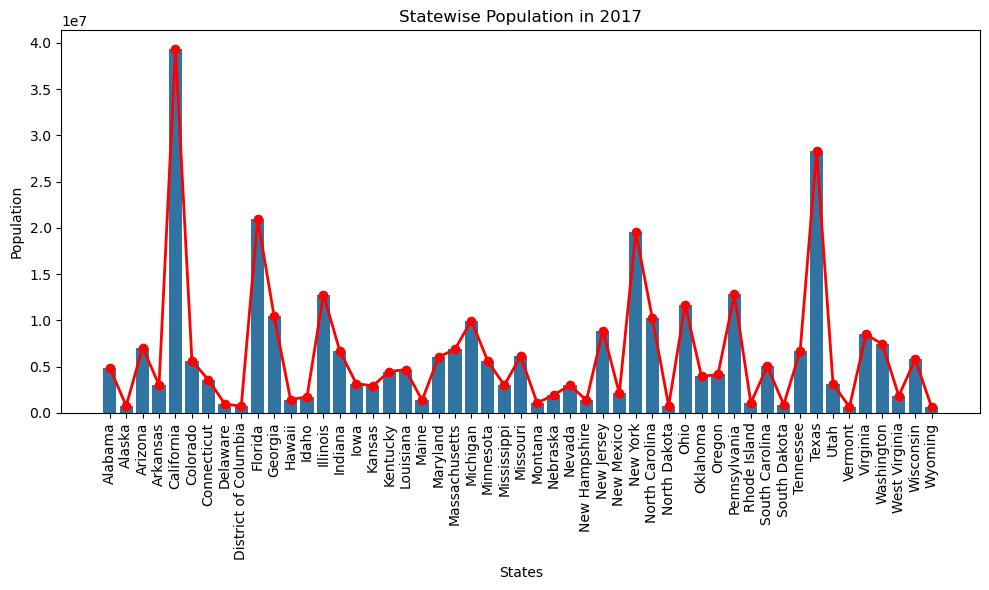

In [135]:
# Create a bar plot for State_Population_2017 using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='State.1', y='State_Population_2017', data=df_state, errorbar=None)

plt.plot(df_state['State.1'], df_state['State_Population_2017'], marker='o', color='red', linestyle='-', linewidth=2)
plt.title('Statewise Population in 2017')
plt.xlabel('States')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

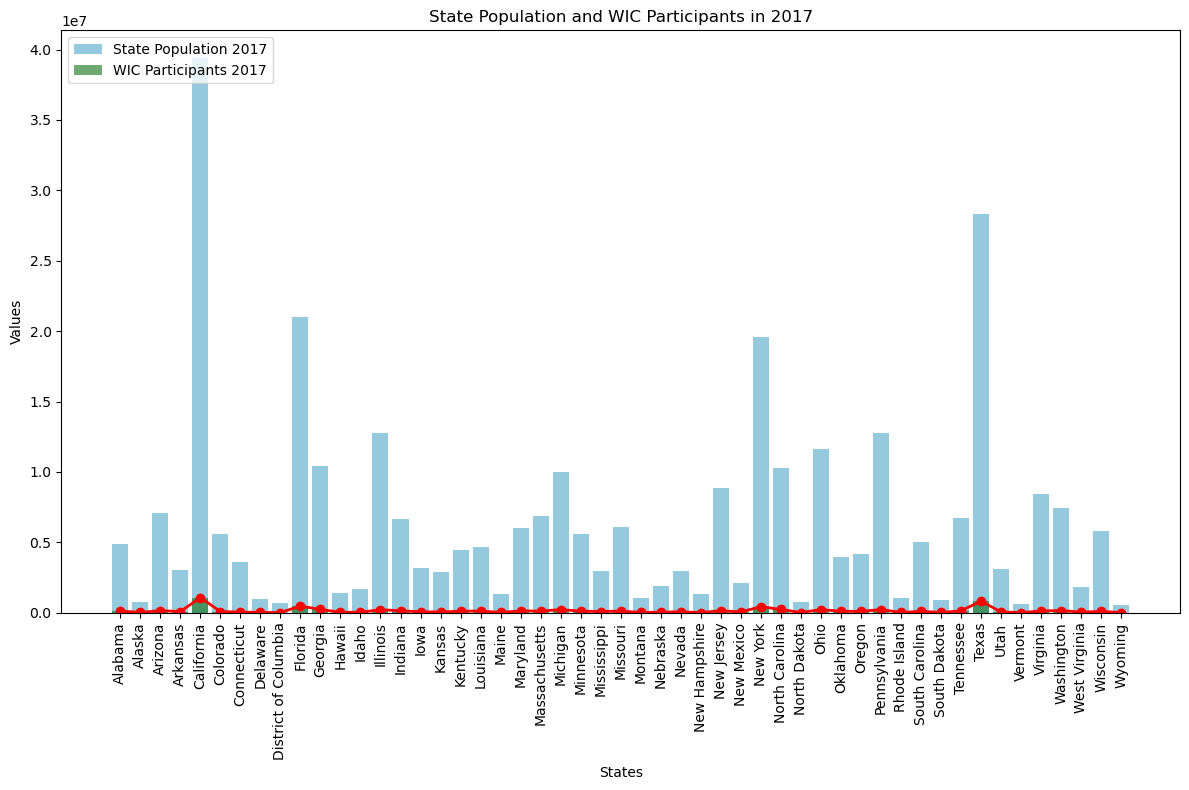

In [137]:
# Create a bar plot for State_Population_2017 and WIC_PART_2017 using seaborn
plt.figure(figsize=(12, 8))

# Create the bar plot for State_Population_2017
sns.barplot(x='State.1', y='State_Population_2017', data=df_state, errorbar=None, color='skyblue', label='State Population 2017')

# Create the bar plot for WIC_PART_2017 with an offset
sns.barplot(x='State.1', y='WIC_PART_2017', data=df_state, errorbar=None, color='green', label='WIC Participants 2017', alpha=0.6)

#Line plot
plt.plot(df_state['State.1'], df_state['WIC_PART_2017'], marker='o', color='red', linestyle='-', linewidth=2)
plt.title('State Population and WIC Participants in 2017')
plt.xlabel('States')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

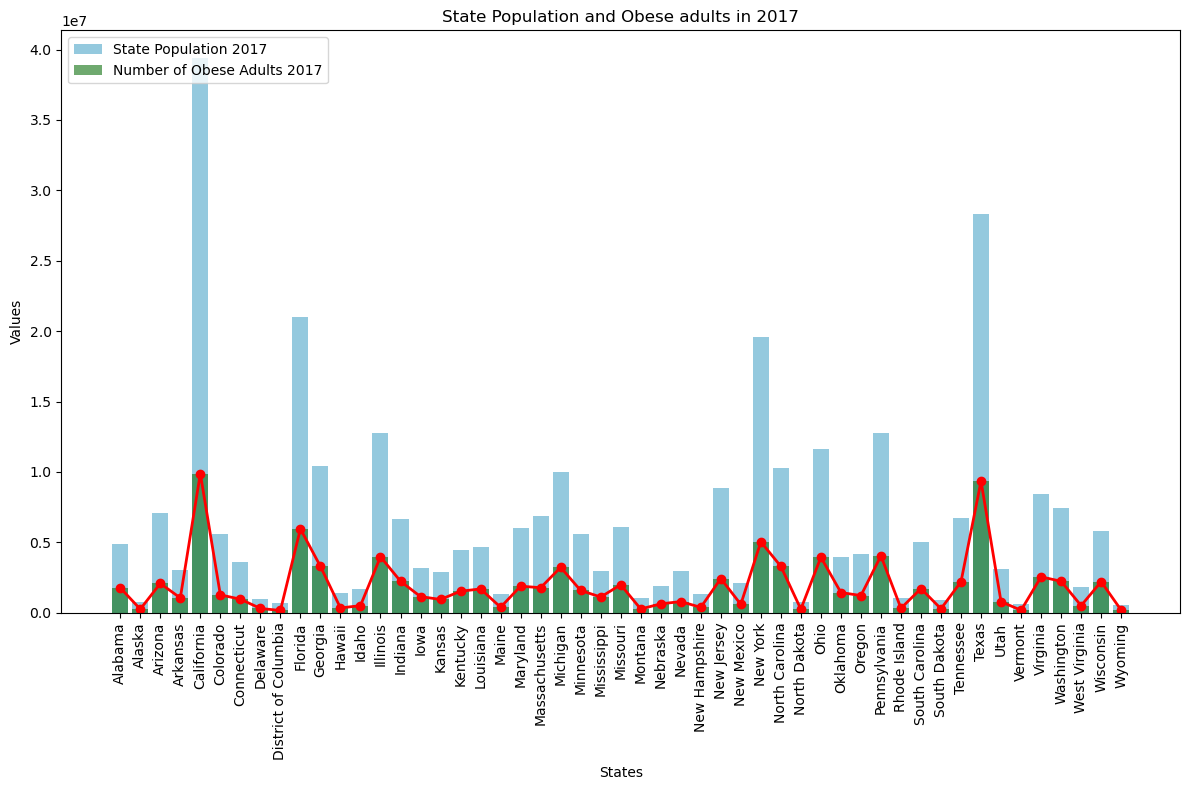

In [107]:
# Create a bar plot for State_Population_2017 and WIC_PART_2017 using seaborn
plt.figure(figsize=(12, 8))

# Create the bar plot for State_Population_2017
sns.barplot(x='State.1', y='State_Population_2017', data=df_state, errorbar=None, color='skyblue', label='State Population 2017')

# Create the bar plot for WIC_PART_2017 with an offset
sns.barplot(x='State.1', y='Number_Obese_Adults_2017', data=df_state, errorbar=None, color='green', label='Number of Obese Adults 2017', alpha=0.6)

#Line plot
plt.plot(df_state['State.1'], df_state['Number_Obese_Adults_2017'], marker='o', color='red', linestyle='-', linewidth=2)
plt.title('State Population and Obese adults in 2017')
plt.xlabel('States')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

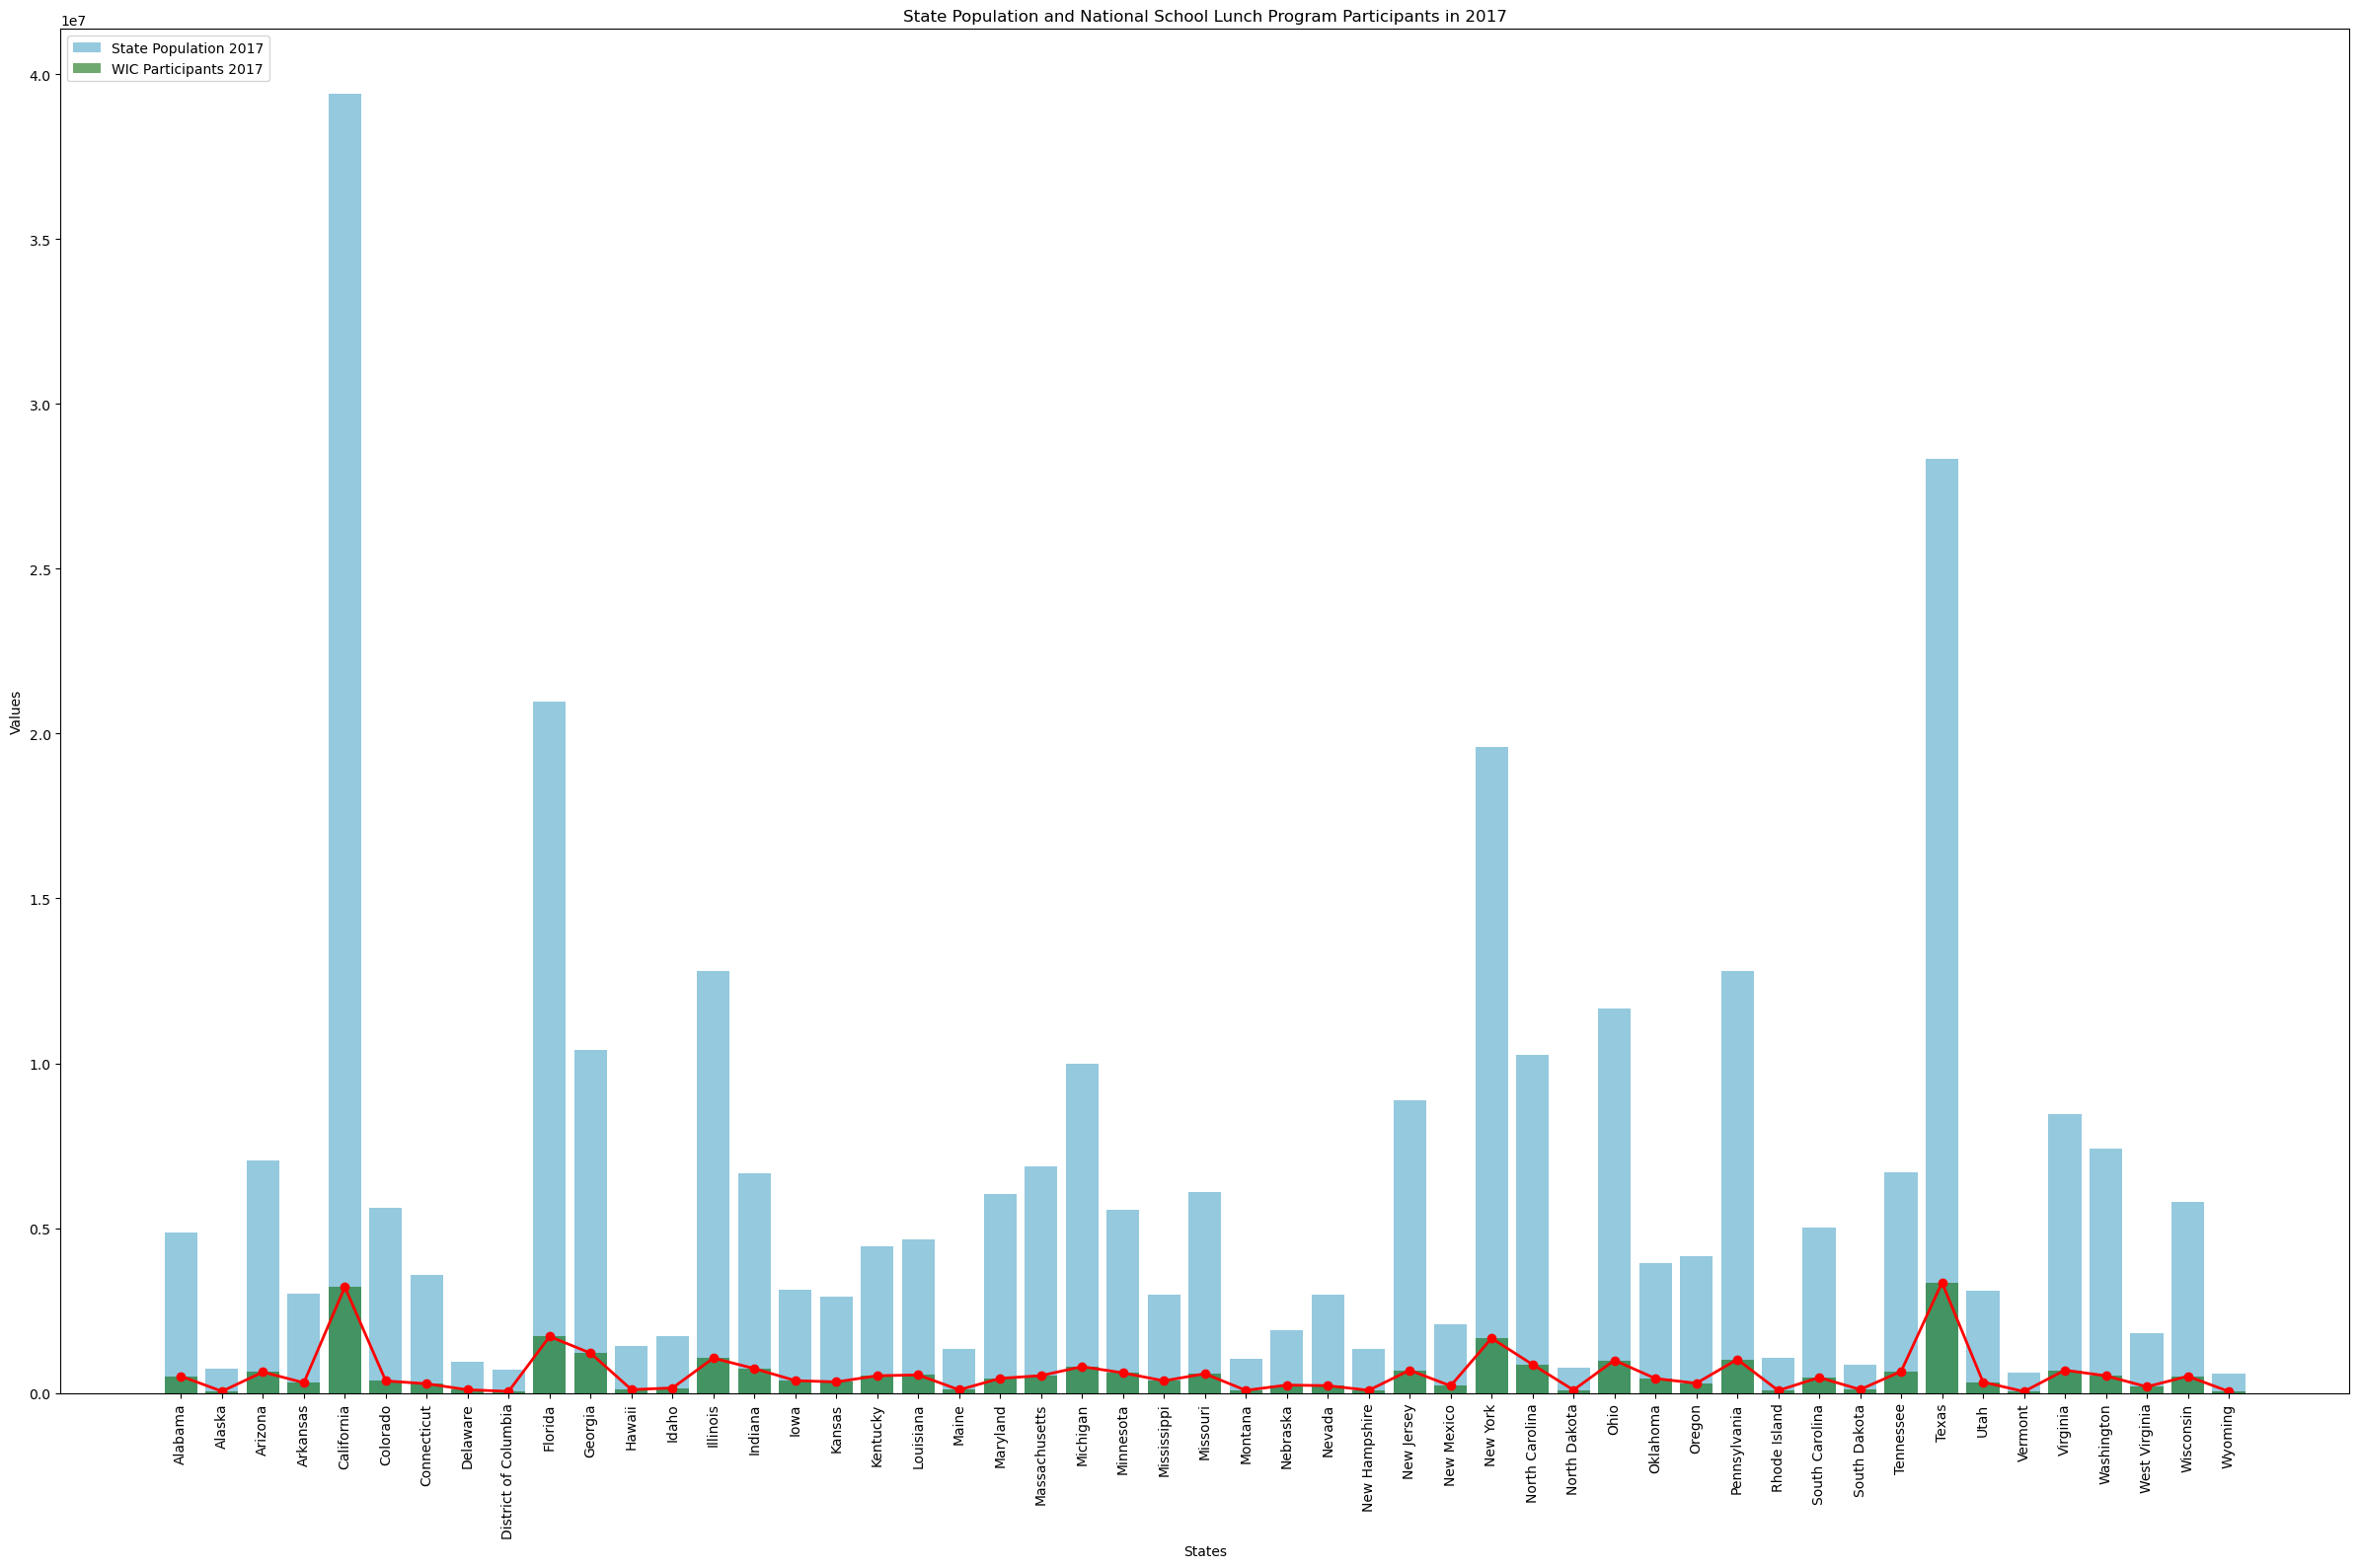

In [106]:
# Create a bar plot for State_Population_2017 and WIC_PART_2017 using seaborn
plt.figure(figsize=(24,16))

# Create the bar plot for State_Population_2017
sns.barplot(x='State.1', y='State_Population_2017', data=df_state, errorbar=None, color='skyblue', label='State Population 2017')

# Create the bar plot for WIC_PART_2017 with an offset
sns.barplot(x='State.1', y='NSLP_PART_2017', data=df_state, errorbar=None, color='green', label='WIC Participants 2017', alpha=0.6)

#Line plot
plt.plot(df_state['State.1'], df_state['NSLP_PART_2017'], marker='o', color='red', linestyle='-', linewidth=2)
plt.title('State Population and National School Lunch Program Participants in 2017')
plt.xlabel('States')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

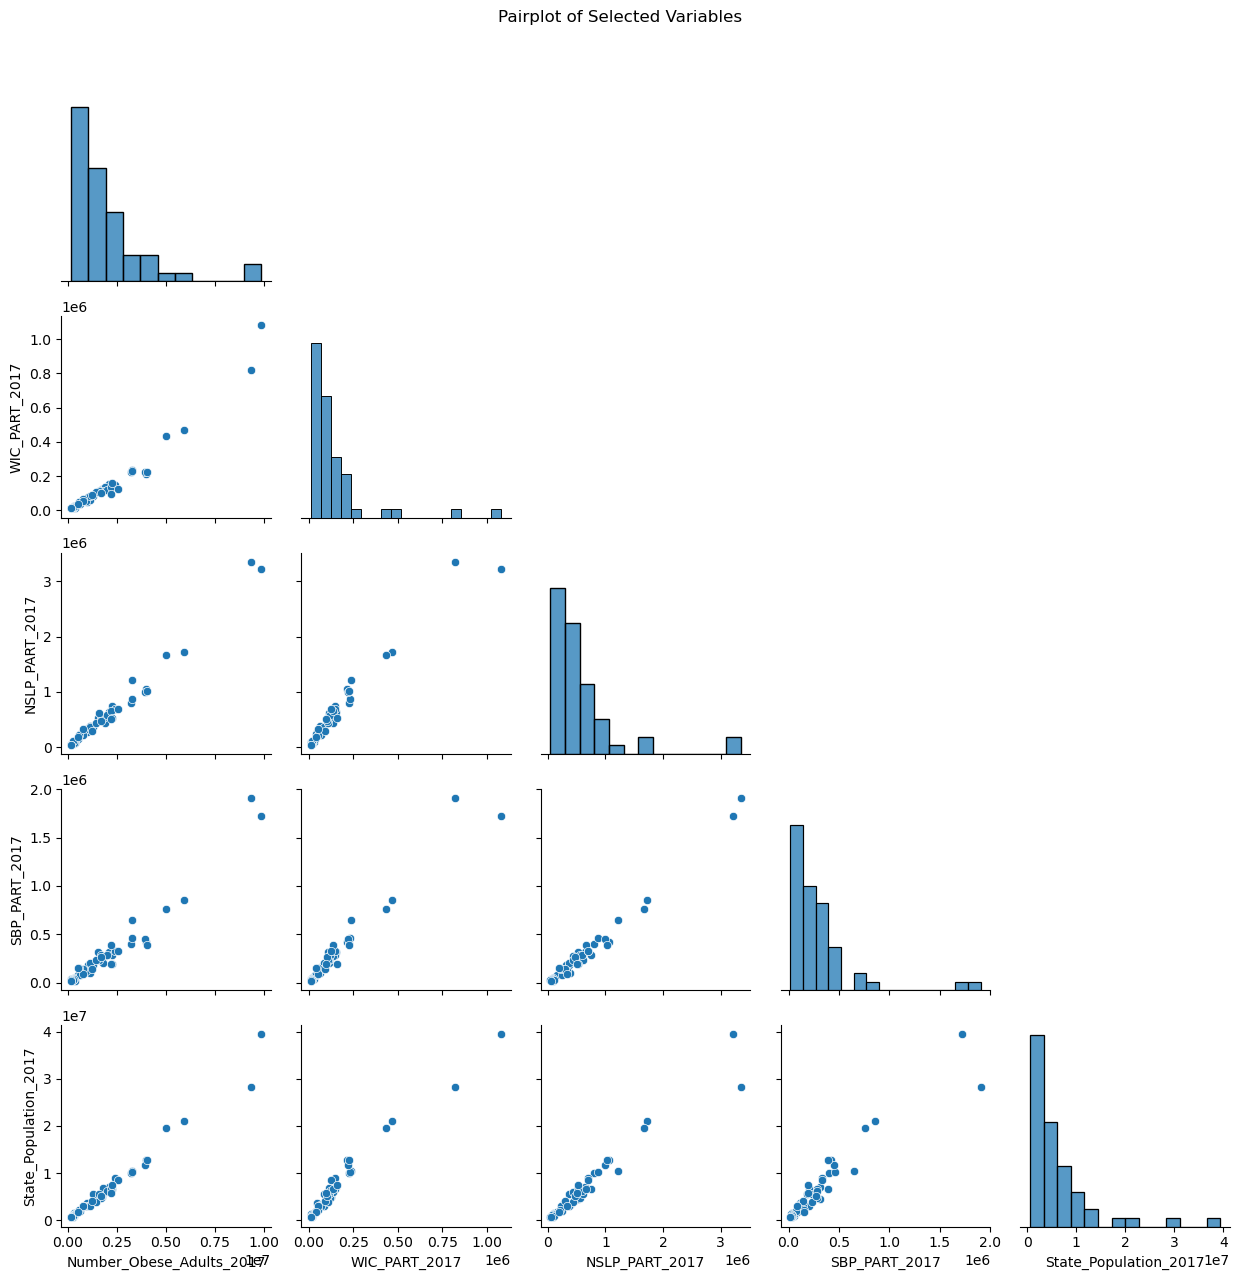

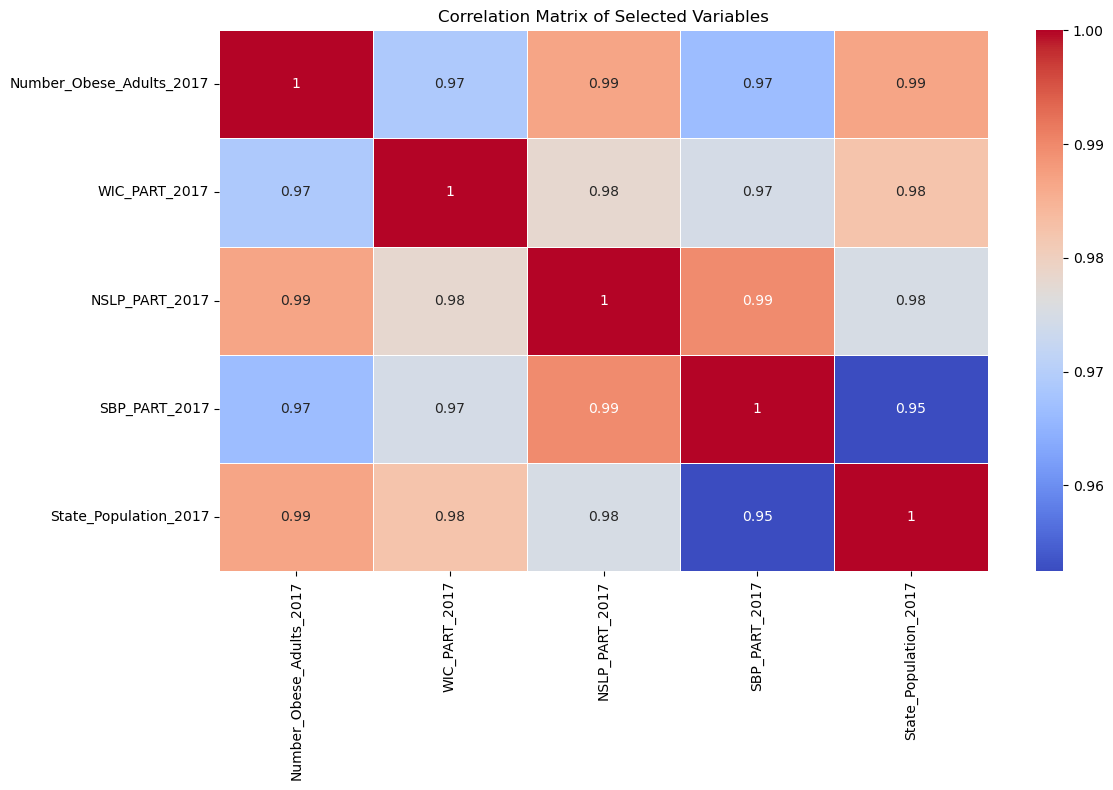

In [118]:
selected_columns = ['Number_Obese_Adults_2017', 'WIC_PART_2017', 'NSLP_PART_2017', 'SBP_PART_2017','State_Population_2017']
df_selected = df_state[selected_columns]

# Create a pairplot
sns.pairplot(df_selected,corner = True)
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.tight_layout()
plt.show()

# Create a correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Selected Variables')
plt.tight_layout()
plt.show()

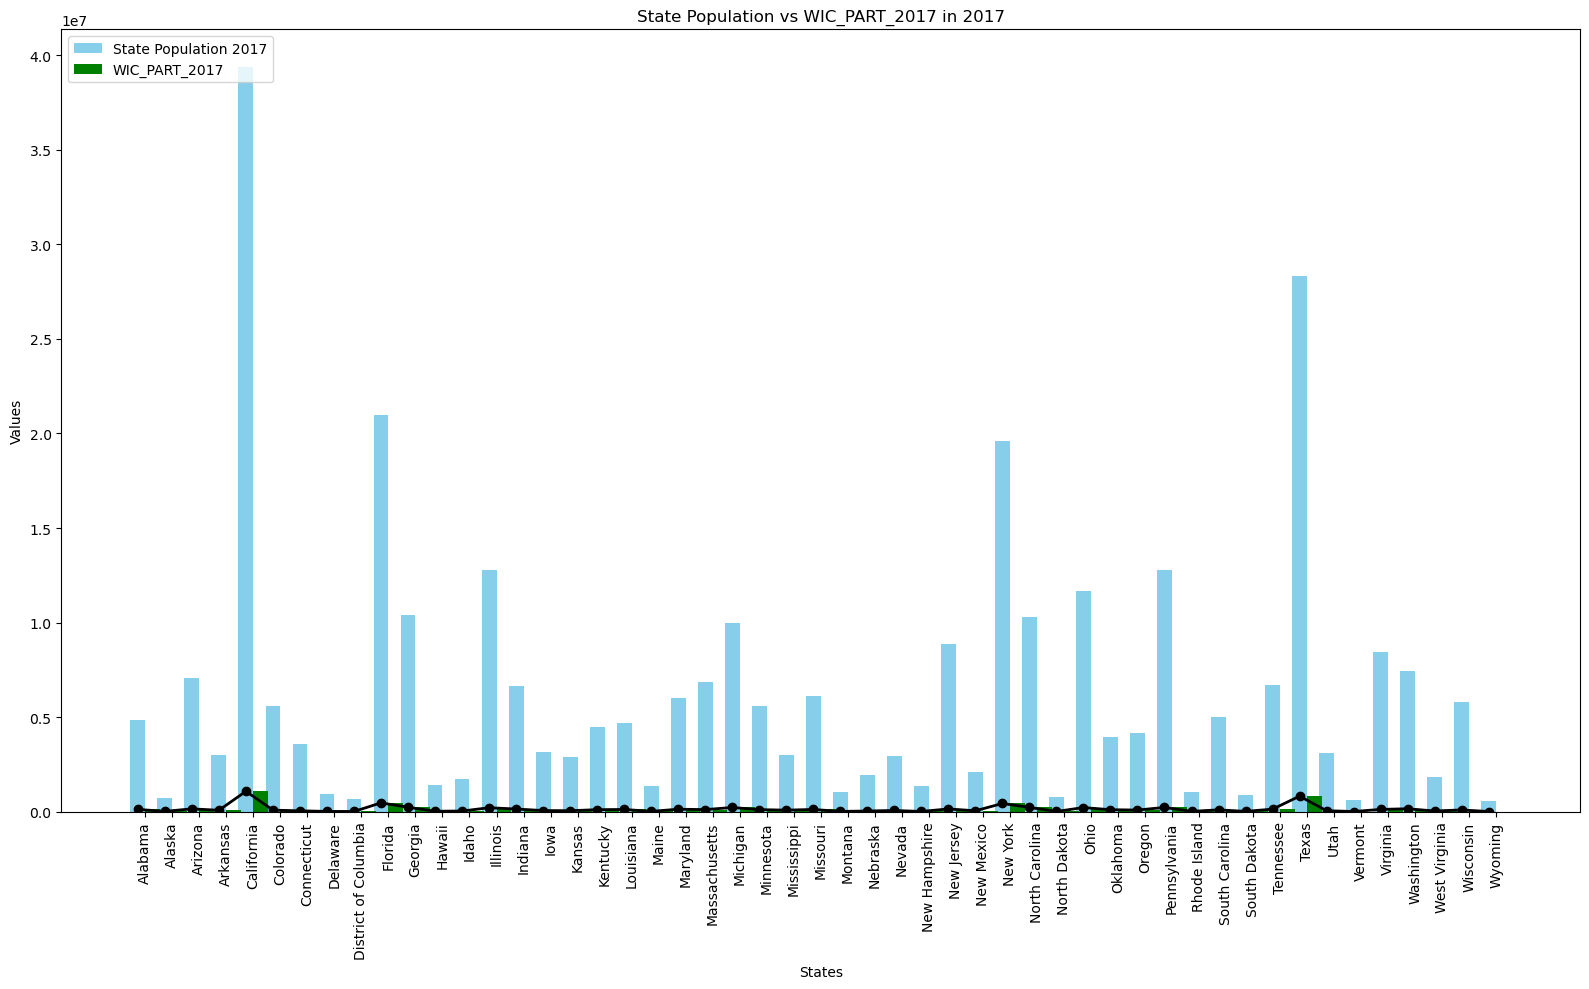

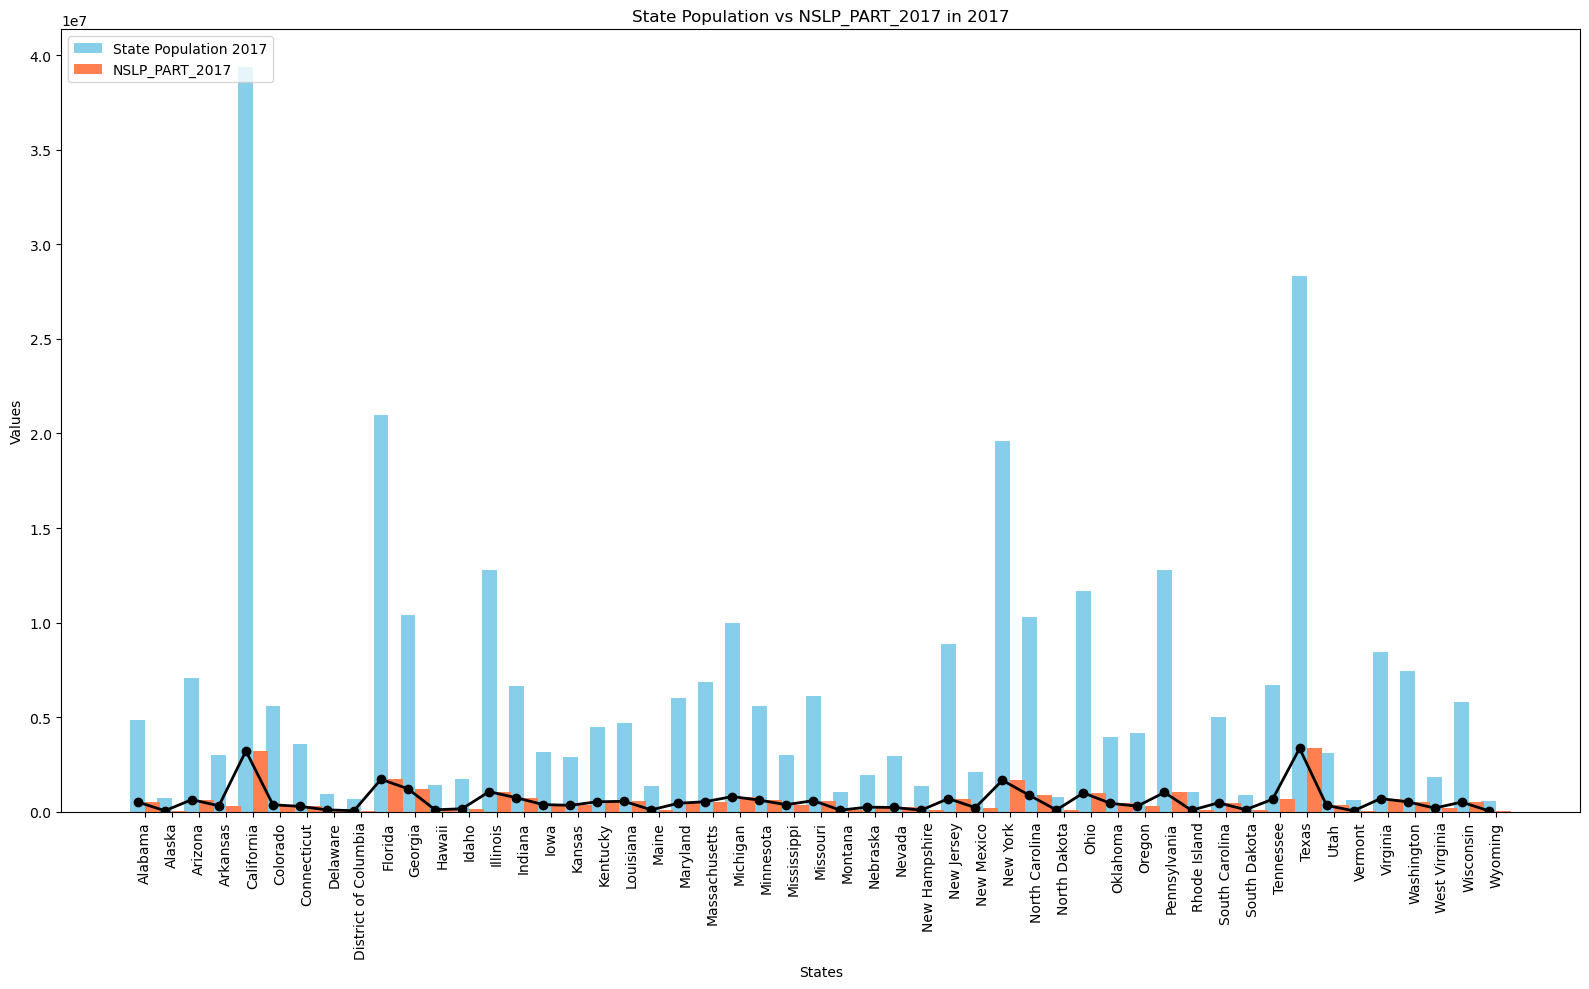

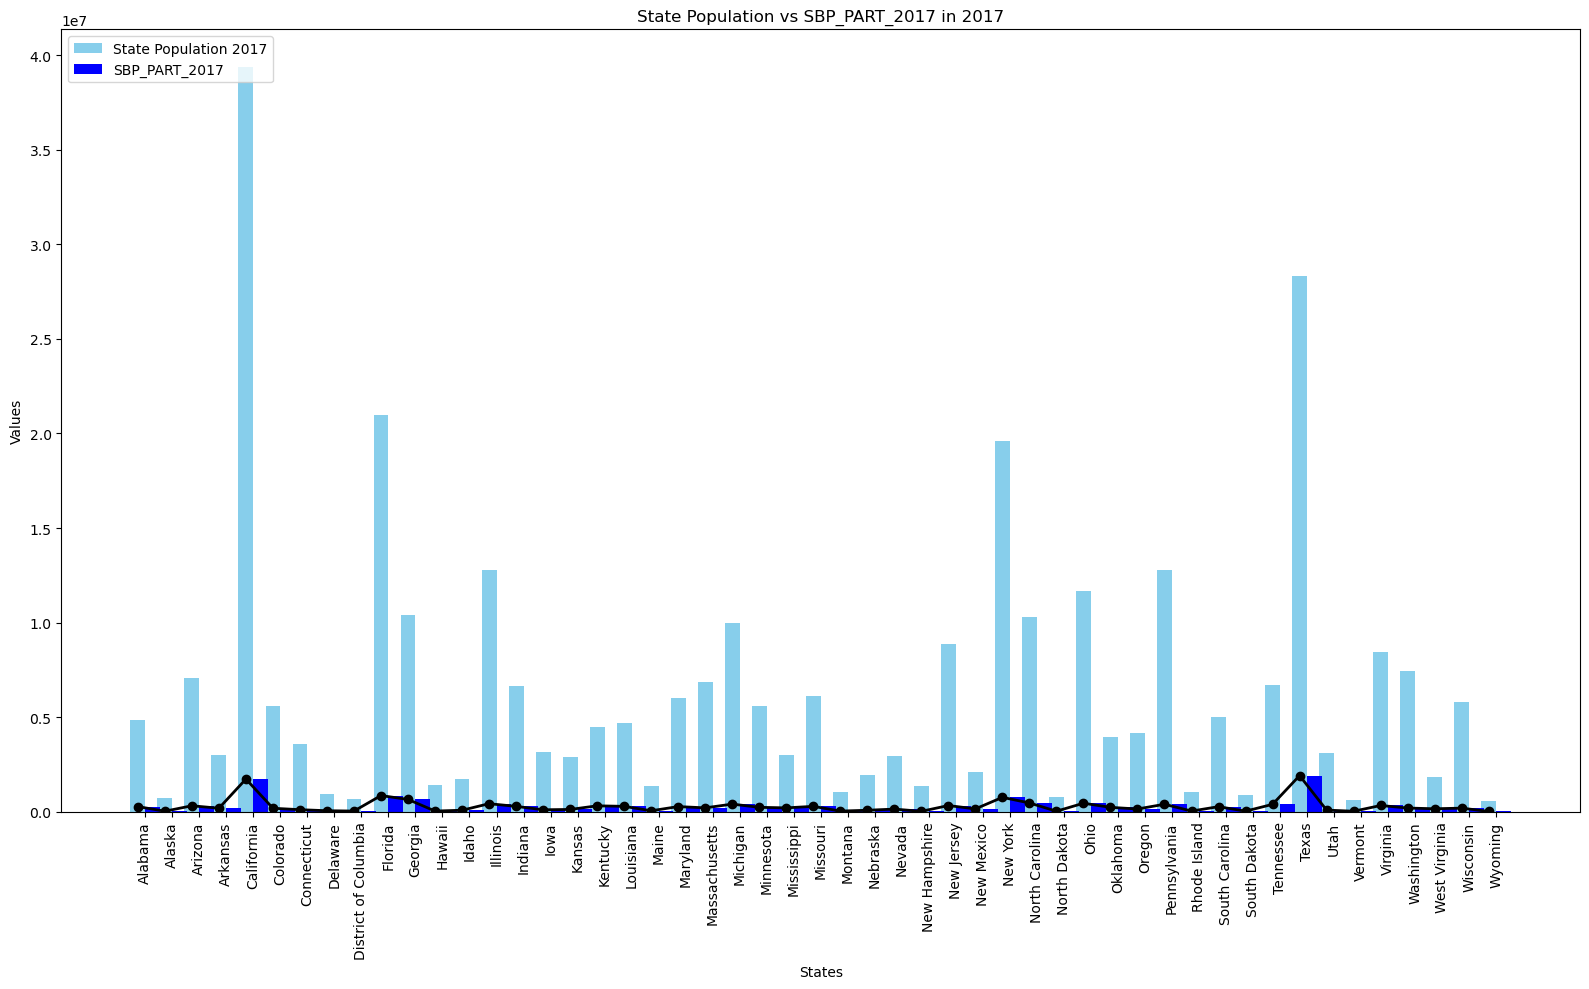

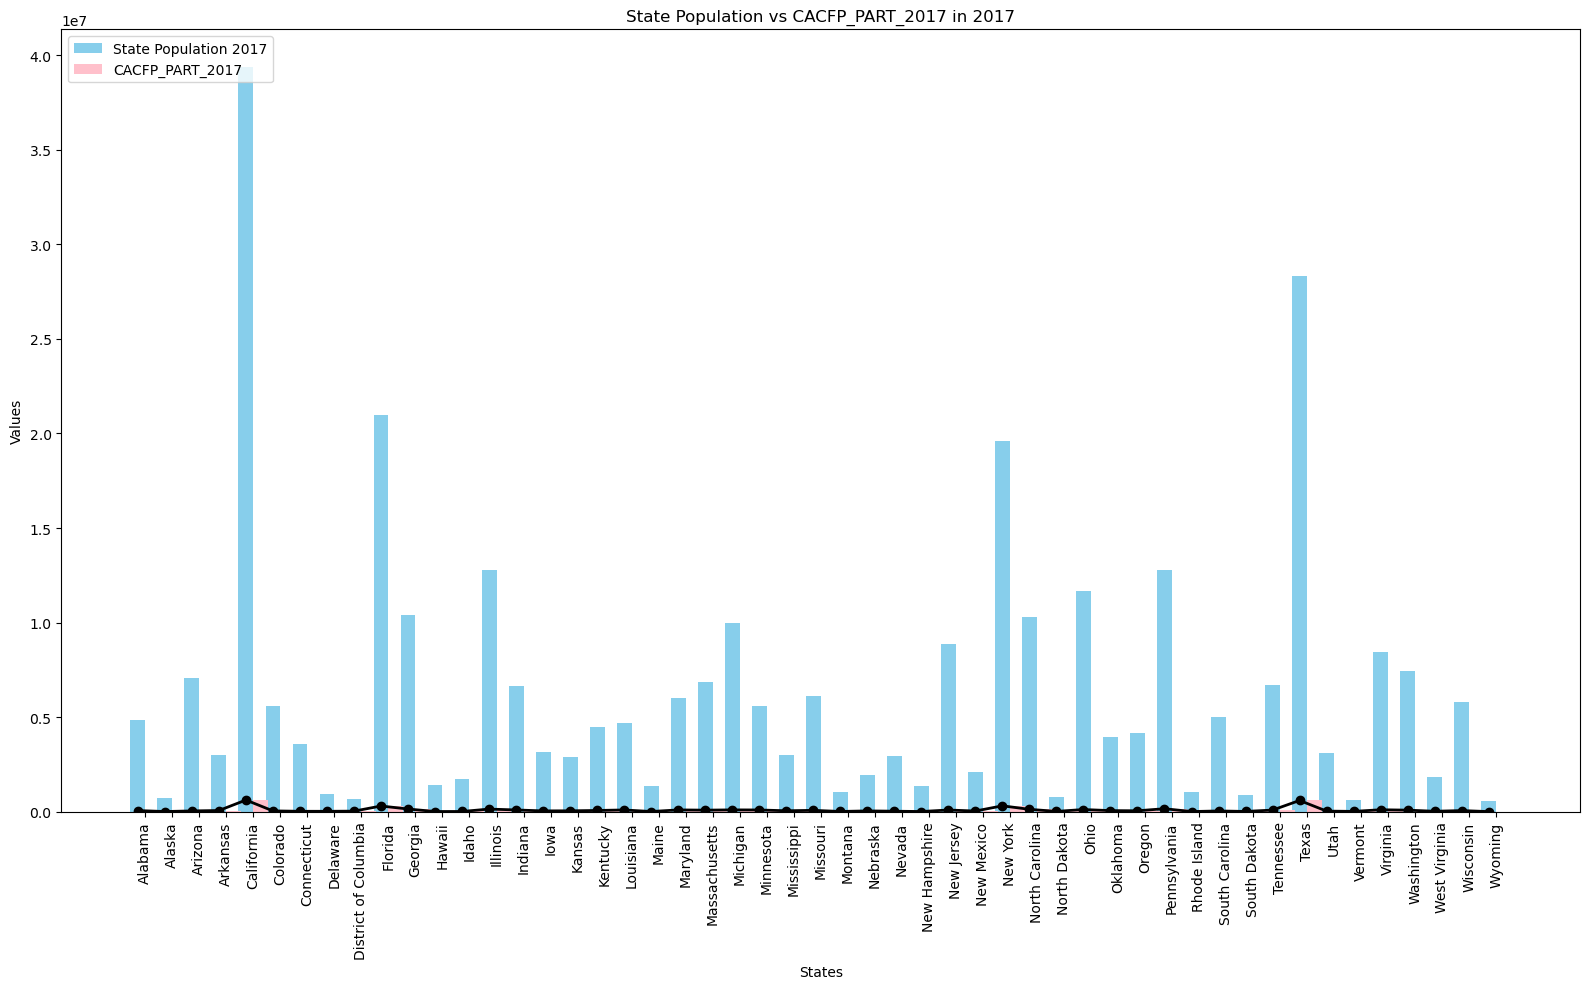

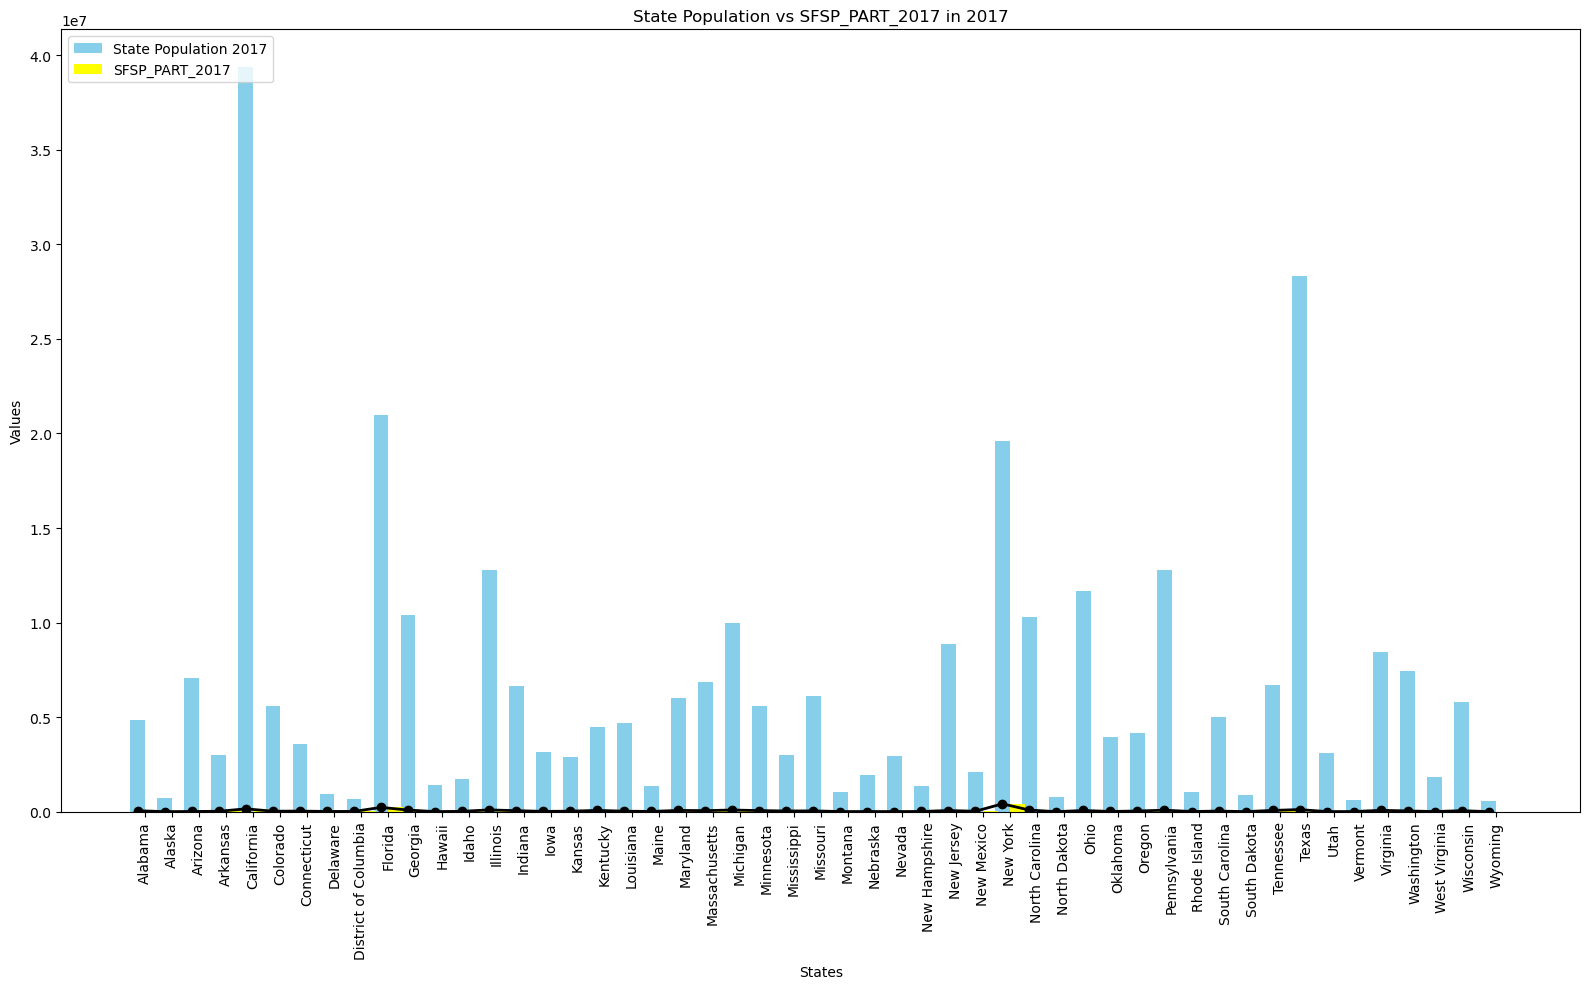

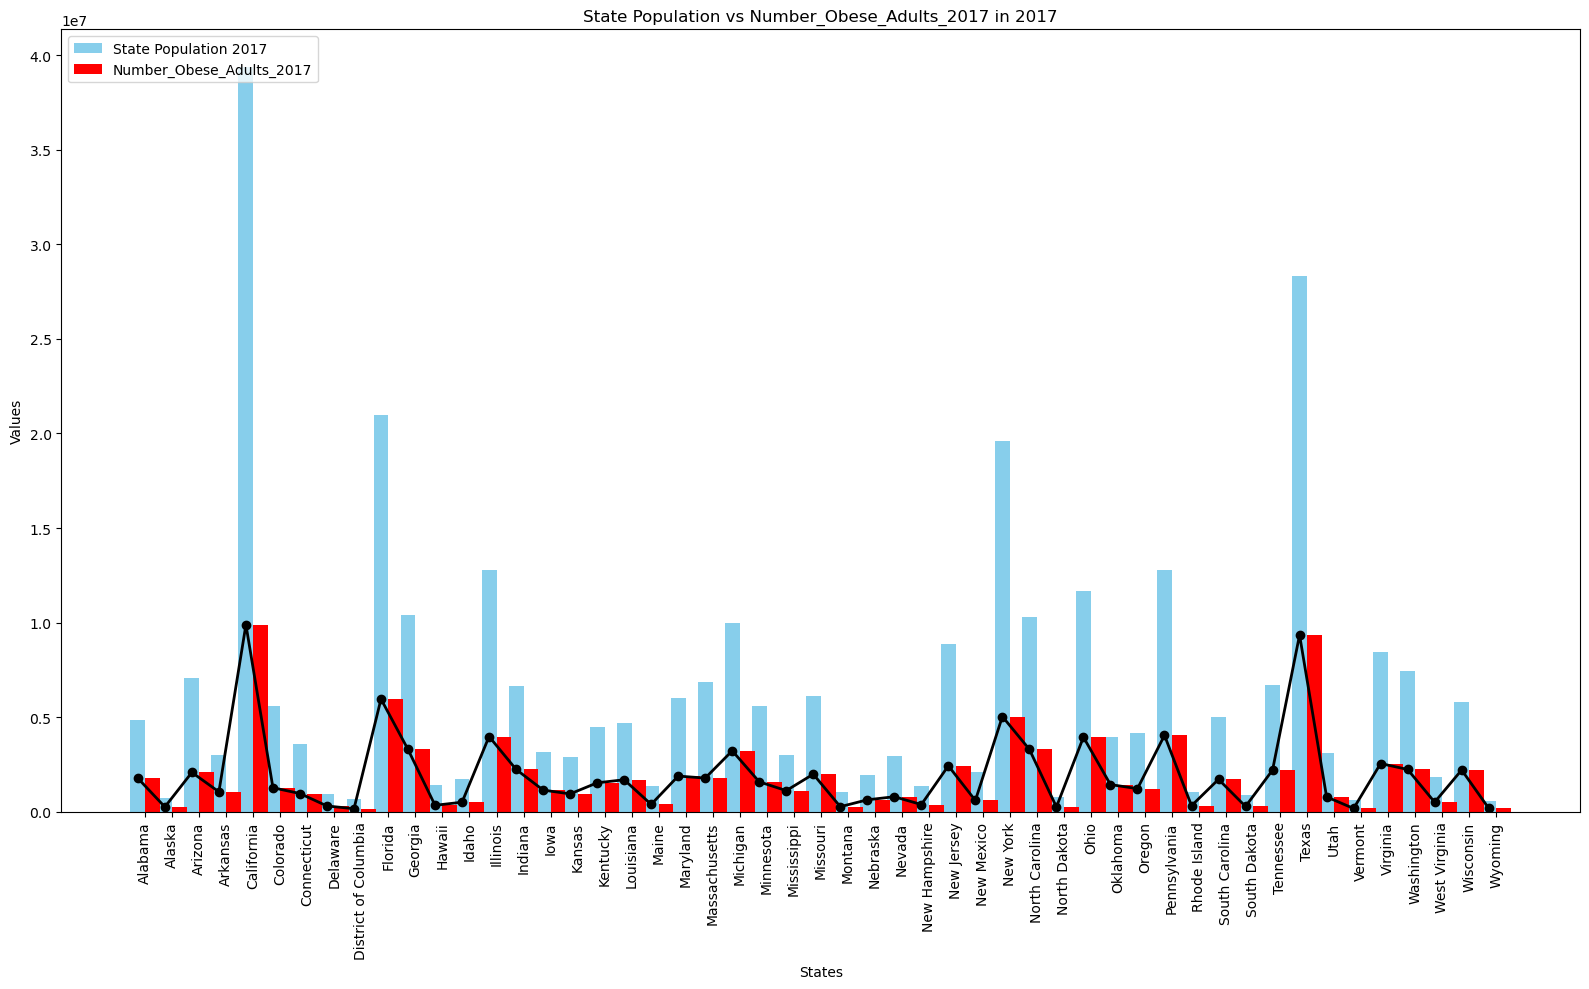

In [125]:
# Create a series of bar plots comparing each parameter with State_Population_2017
parameters = ['WIC_PART_2017', 'NSLP_PART_2017', 'SBP_PART_2017', 'CACFP_PART_2017', 'SFSP_PART_2017', 'Number_Obese_Adults_2017']
colors = ['green', 'coral', 'blue', 'pink', 'yellow','red']



for i, parameter in enumerate(parameters):
#     plt.subplot(len(parameters), 1, i + 1)
    ind = np.arange(len(df_state))
    width = 0.55
    plt.figure(figsize=(16, 10))
    # Bar plot for State_Population_2017
    plt.bar(ind, df_state['State_Population_2017'], width, label='State Population 2017', color='skyblue')
    
    # Bar plot for the parameter
    plt.bar(ind + width, df_state[parameter], width, label=parameter, color=colors[i])
    #Line plot
    plt.plot(df_state['State.1'], df_state[parameter], marker='o', color='black', linestyle='-', linewidth=2)
    
    plt.title(f'State Population vs {parameter} in 2017')
    plt.xlabel('States')
    plt.ylabel('Values')
    plt.xticks(ind + width / 2, df_state['State.1'],rotation=90)
    plt.legend(loc='upper left')
    plt.tight_layout()

    plt.show()

In [127]:
# Same plot but a little interactive
colors = {
    'WIC_PART_2017': 'green',
    'NSLP_PART_2017': 'coral',
    'SBP_PART_2017': 'blue',
    'CACFP_PART_2017': 'pink',
    'SFSP_PART_2017': 'yellow',
    'Number_Obese_Adults_2017': 'red'
}

# Create a subplot with a row for each parameter
parameters = ['WIC_PART_2017', 'NSLP_PART_2017', 'SBP_PART_2017', 'CACFP_PART_2017', 'SFSP_PART_2017', 'Number_Obese_Adults_2017']
fig = make_subplots(rows=len(parameters), cols=1, subplot_titles=[f'State Population vs {param} in 2017' for param in parameters])

for i, parameter in enumerate(parameters):
    fig.add_trace(
        go.Bar(x=df_state['State.1'], y=df_state['State_Population_2017'], name='State Population 2017', marker_color='skyblue'),
        row=i+1, col=1
    )
    fig.add_trace(
        go.Bar(x=df_state['State.1'], y=df_state[parameter], name=parameter, marker_color=colors[parameter]),
        row=i+1, col=1
    )

# Update layout for the entire figure
fig.update_layout(
    height=1800,  # Adjust height for better visualization
    title_text='Comparison of State Population with Various Parameters in 2017',
    barmode='group',
    hovermode='x unified'
)

# Show the plot inline
pio.show(fig)

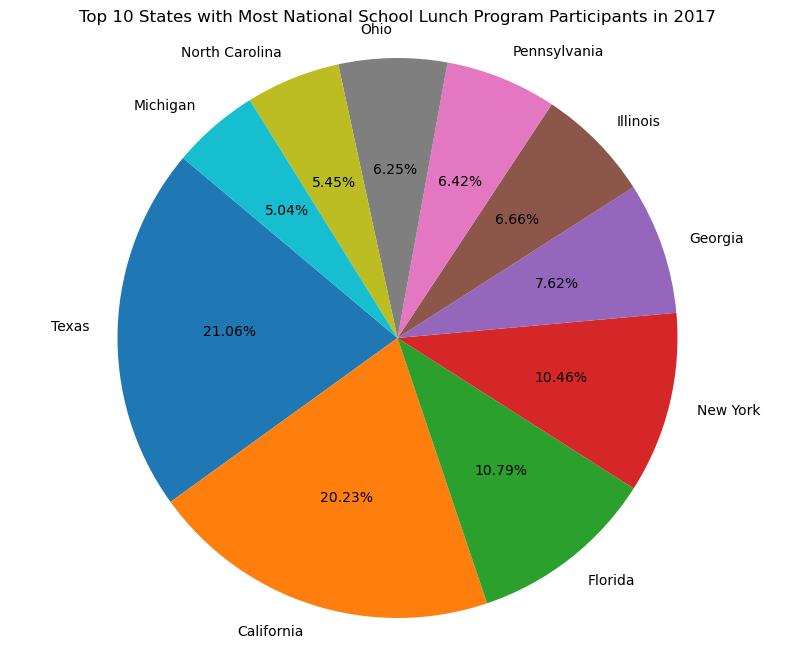

In [128]:
top_10_nslp = df_state.nlargest(10, 'NSLP_PART_2017')

# Values and labels for the pie chart
state_values_nslp = top_10_nslp['NSLP_PART_2017']
state_labels_nslp = top_10_nslp['State.1']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(state_values_nslp, labels=state_labels_nslp, autopct='%1.2f%%', startangle=140)
plt.title('Top 10 States with Most National School Lunch Program Participants in 2017')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.tight_layout()
plt.show()

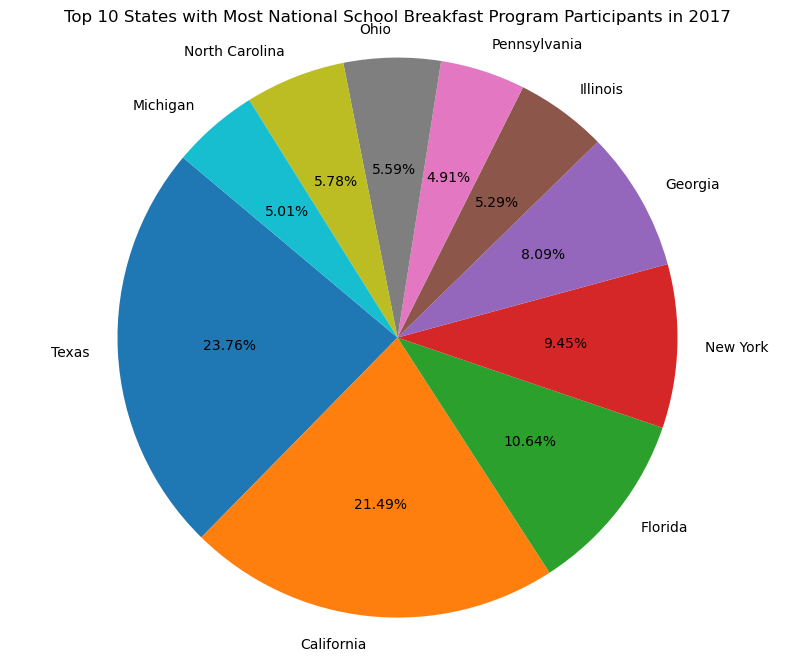

In [129]:
top_10_SBP = df_state.nlargest(10, 'SBP_PART_2017')

# Values and labels for the pie chart
state_values_SBP = top_10_nslp['SBP_PART_2017']
state_labels_SBP = top_10_nslp['State.1']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(state_values_SBP, labels=state_labels_SBP, autopct='%1.2f%%', startangle=140)
plt.title('Top 10 States with Most National School Breakfast Program Participants in 2017')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.tight_layout()
plt.show()

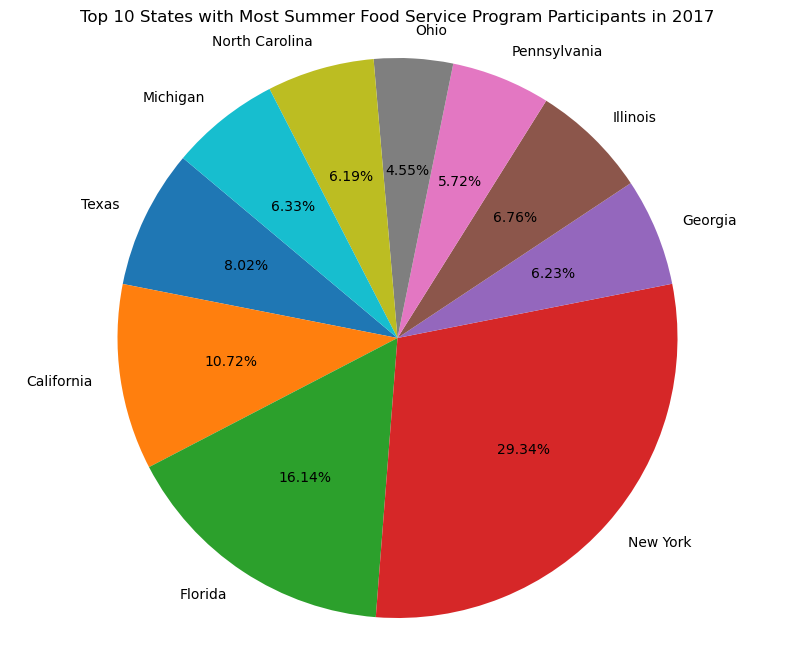

In [130]:
top_10_SFSP = df_state.nlargest(10, 'SFSP_PART_2017')

# Values and labels for the pie chart
state_values_SFSP = top_10_nslp['SFSP_PART_2017']
state_labels_SFSP = top_10_nslp['State.1']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(state_values_SFSP, labels=state_labels_SFSP, autopct='%1.2f%%', startangle=140)
plt.title('Top 10 States with Most Summer Food Service Program Participants in 2017')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.tight_layout()
plt.show()

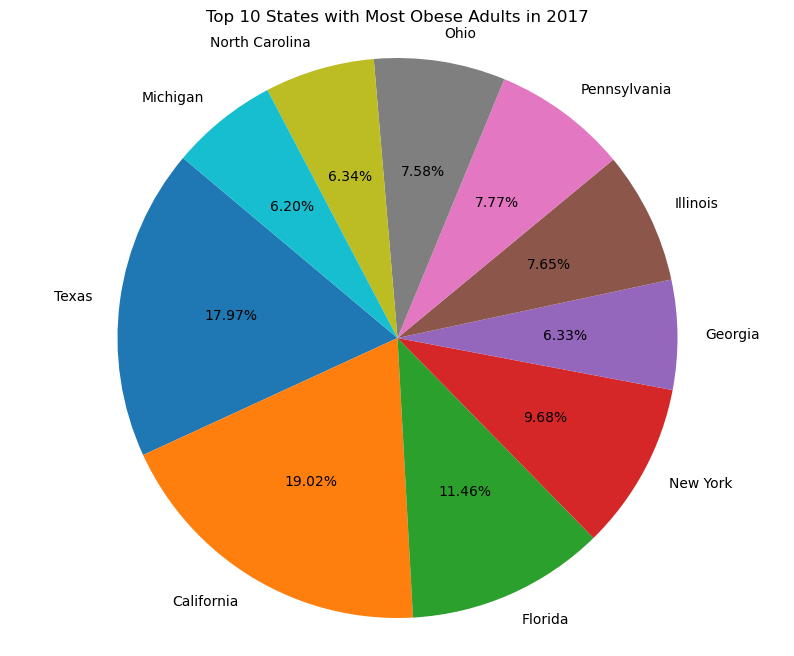

In [132]:
top_10_Obese = df_state.nlargest(10, 'Number_Obese_Adults_2017')

# Values and labels for the pie chart
state_values_Obese = top_10_nslp['Number_Obese_Adults_2017']
state_labels_Obese = top_10_nslp['State.1']

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(state_values_Obese, labels=state_labels_Obese, autopct='%1.2f%%', startangle=140)
plt.title('Top 10 States with Most Obese Adults in 2017')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.tight_layout()
plt.show()